# Analysis Functions

This notebook defines several functions that are useful for analyzing data. Each function is grouped with all the imports needed for the function to operate. Below each function is an example of how it can be used on an actual dataset.


FUNCTIONS
- fund_nulls(df)
- features_by_type(df,dtype)
- histogram(df, column, bins, x_label)
- correlation(df, column)
- plot_lr(df, column_x, column_y)
- plot_ctg(df, column)
- plot_num_ctg(dataframe, numeric, categorical)

In [1]:
import pandas as pd
def load_data(): return pd.read_csv('datasets/houses/train.csv')

---

## Find Nulls

This function finds all of the columns in a Pandas Dataframe that contain some number of null values and then prints the percentage of nulls per column out of the total number of records.

In [2]:
import pandas as pd

def find_nulls(df):
    for x in range(0, df.columns.size):
        column_name = df.columns[x]
        count = df[column_name].isnull().sum()
        percent = (count / len(df[column_name]) * 100)
        if count > 0:
            print(column_name, ":", percent, "percent")

#### Example

In [3]:
houses = load_data()
find_nulls(houses)

LotFrontage : 17.7397260274 percent
Alley : 93.7671232877 percent
MasVnrType : 0.547945205479 percent
MasVnrArea : 0.547945205479 percent
BsmtQual : 2.53424657534 percent
BsmtCond : 2.53424657534 percent
BsmtExposure : 2.60273972603 percent
BsmtFinType1 : 2.53424657534 percent
BsmtFinType2 : 2.60273972603 percent
Electrical : 0.0684931506849 percent
FireplaceQu : 47.2602739726 percent
GarageType : 5.54794520548 percent
GarageYrBlt : 5.54794520548 percent
GarageFinish : 5.54794520548 percent
GarageQual : 5.54794520548 percent
GarageCond : 5.54794520548 percent
PoolQC : 99.5205479452 percent
Fence : 80.7534246575 percent
MiscFeature : 96.301369863 percent


---

## Features By Type

This function returns the features from a given Dataframe that match a specific value type.

In [4]:
import pandas as pd
import numpy as np

def features_by_type(df, dtype):
    return df.select_dtypes(include=[dtype])

#### Example

In [5]:
houses = load_data()
features_by_type(houses, np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

---

## Histogram

This function plots a simple histogram given a Dataframe and a given column.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

def histogram(df, column, bins, x_label):
    df.hist(column=column, bins=bins, figsize=(20,10))
    plt.xlabel(x_label)
    plt.ylabel("Quantity")
    plt.show()

#### Example

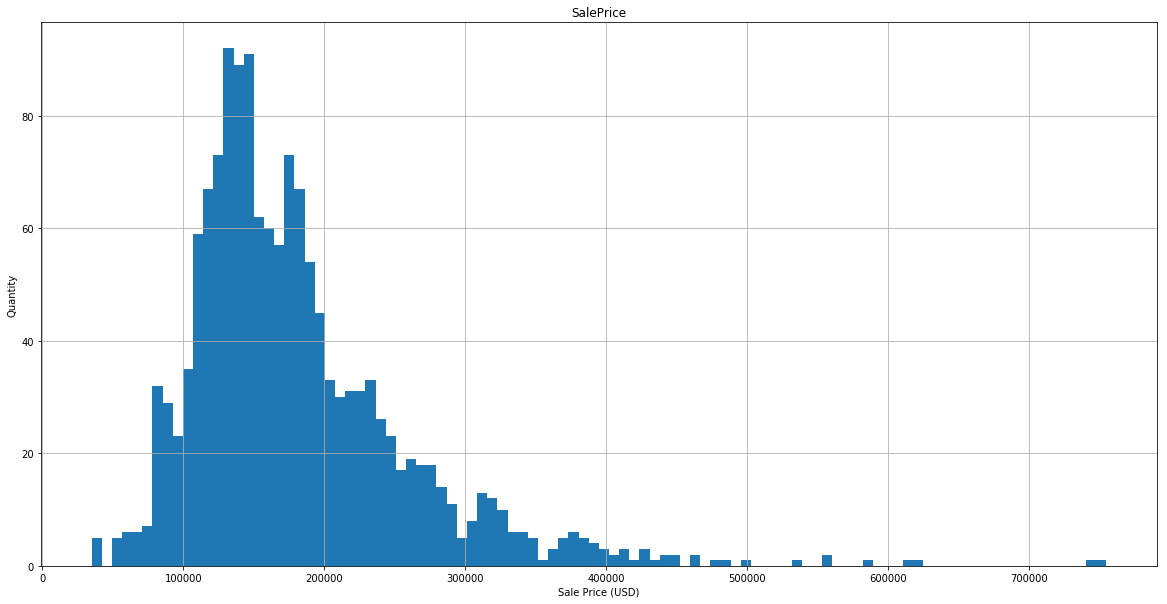

In [7]:
houses = load_data()
histogram(houses, 'SalePrice', 100, 'Sale Price (USD)')

---

## Correlation

This function finds the correlation of columns in a Dataframe against a specific column of the Dataframe.

In [8]:
import pandas as pd

def correlation(df, column):
    print(df.corr()[column].sort_values(ascending=False))

#### Example

In [9]:
houses = load_data()
correlation(houses, 'SalePrice')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

---

## Plot Linear Regression

This function plots a linear regression against two numeric columns in a Dataframe.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_lr(df, column_x, column_y):
    x = df[column_x]
    y = df[column_y]
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, y, "g.")
    plt.plot(x, m*x + b, "b-")
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.show()

#### Example

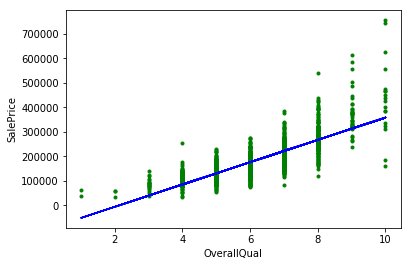

In [11]:
houses = load_data()
plot_lr(houses, 'OverallQual', 'SalePrice')

---

## Plot Categorical Data

This function is used to create a bar graph for categorical data and populates any missing values with 'NA'.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

def plot_ctg(df, column):
    df[column].fillna('NA').value_counts().plot(kind='bar')
    plt.show()

#### Example

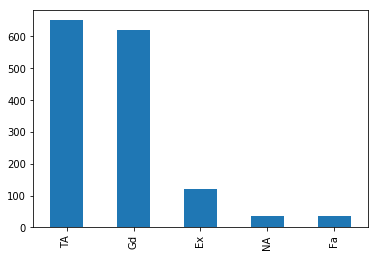

In [13]:
houses = load_data()
plot_ctg(houses, 'BsmtQual')

---

## Plot Numerical VS Categorical Data

This function is used to plot categorical data against numeric data in a Dataframe.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

def plot_num_ctg(dataframe, numeric, categorical):
    df = dataframe.copy()
    x = df[numeric]
    y = df[categorical].fillna('NA')
    
    onehot = pd.get_dummies(y)
    df = df.join(onehot)
    print("Histograms for", categorical, "against", numeric)
    for col in range(0, len(onehot.columns)):
        print(onehot.columns[col])
        df.hist(column=numeric, by=df[onehot.columns[col]])
        plt.axis([0, 10, 0, 400])
        plt.show()

#### Example

Histograms for BsmtQual against OverallQual
Ex


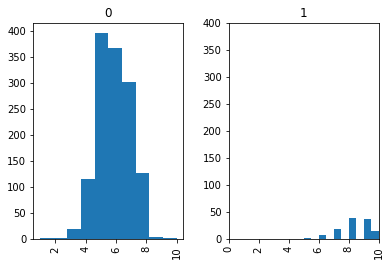

Fa


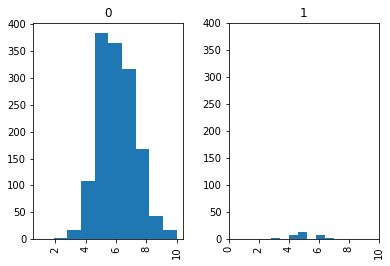

Gd


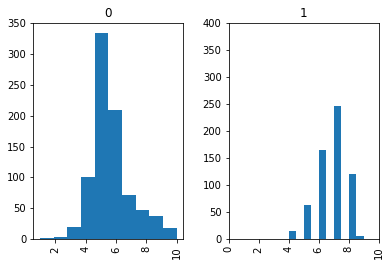

NA


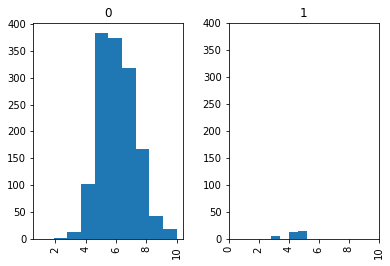

TA


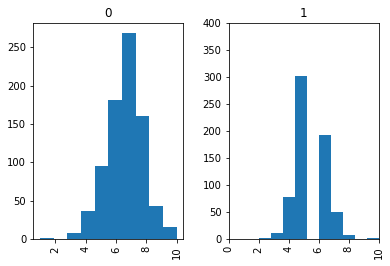

In [15]:
houses = load_data()
plot_num_ctg(houses, 'OverallQual', 'BsmtQual')